In [63]:
import pandas as pd
import numpy as np

from IPython.display import display
pd.options.display.max_columns = None

import matplotlib.pyplot as plt
#from matplotlib.pyplot import subplots, show
import seaborn as sns
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import RobustScaler

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import r2_score

from sklearn.metrics import confusion_matrix


Web Watson Analytics IBM
https://www.ibm.com/communities/analytics/watson-analytics-blog/marketing-customer-value-analysis/

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
display(df.head())


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## Brain Storming and Data Preparation

Objetivo: Predecir la cantidad total reclamada "Total Claim Amount" de un cliente según sus características sociodemográficas y del tipo de póliza, ingresos, coche, etc. 
    

### Data Cleaning and Exploratory Analysis

In [3]:
# Columns of dataset
print( len(df.columns))
print(df.columns)
print(df.info())

24
Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
Customer                         9134 non-null object
State                            9134 non-null object
Customer Lifetime Value          9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective To Date                9134 non-null object
Employ

In [4]:
# Missing values
df.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [5]:
# Know the unique values for each column
for item in df.columns.tolist():
    print(item, len(df[item].unique()))

Customer 9134
State 5
Customer Lifetime Value 8041
Response 2
Coverage 3
Education 5
Effective To Date 59
EmploymentStatus 5
Gender 2
Income 5694
Location Code 3
Marital Status 3
Monthly Premium Auto 202
Months Since Last Claim 36
Months Since Policy Inception 100
Number of Open Complaints 6
Number of Policies 9
Policy Type 3
Policy 9
Renew Offer Type 4
Sales Channel 4
Total Claim Amount 5106
Vehicle Class 6
Vehicle Size 3


### Categorical Variable

#### Effective To Date

Cambiamos Location Code de tipo

In [6]:
print(df['Effective To Date'].dtype)
print(df['Effective To Date'].head())

object
0    2/24/11
1    1/31/11
2    2/19/11
3    1/20/11
4     2/3/11
Name: Effective To Date, dtype: object


In [7]:
df['Effective To Date'] = pd.to_datetime(df['Effective To Date'])

In [8]:
print(df['Effective To Date'].dtype)
print(df['Effective To Date'].min())
print(df['Effective To Date'].max())
print(df['Effective To Date'].dt.year.value_counts())
print(df['Effective To Date'].dt.month.value_counts())

datetime64[ns]
2011-01-01 00:00:00
2011-02-28 00:00:00
2011    9134
Name: Effective To Date, dtype: int64
1    4898
2    4236
Name: Effective To Date, dtype: int64


In [9]:
df['Effective To Date'] = df['Effective To Date'].apply(lambda x: x.toordinal())

#### Customers
Unique value for each customer

In [10]:
print('type', df.Customer.dtype)
print(df.Customer.head())
print(len(df.Customer.unique()))

type object
0    BU79786
1    QZ44356
2    AI49188
3    WW63253
4    HB64268
Name: Customer, dtype: object
9134


In [11]:
df.drop(labels=['Customer'], axis=1, inplace=True)

#### State



In [12]:
print('type', df.State.dtype)
print(df.State.unique())
print(len(df.State.unique()))
print((df.State.value_counts()/ sum(df.State.value_counts()))*100)
a =df.State.value_counts()

type object
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
5
California    34.486534
Oregon        28.476024
Arizona       18.644624
Nevada         9.656229
Washington     8.736589
Name: State, dtype: float64


#### Response
'Response' is a categorical variable:
No     85.7%
Yes    14.3%

In [13]:
print('type', df['Response'].dtype)
print(df['Response'].unique())
print((df.Response.value_counts()/sum(df.State.value_counts()))*100)

type object
['No' 'Yes']
No     85.679877
Yes    14.320123
Name: Response, dtype: float64


#### Coverage
'Coverage' is a categorical variable, with 3 categories (type of coverage): <br>
Basic       61% <br>
Extended    30% <br>
Premium      9% <br>

In [14]:
print('type', df.Coverage.dtype)
print(df.Coverage.unique())
print(len(df.Coverage.unique()))
print((df.Coverage.value_counts()/ sum(df.Coverage.value_counts()))*100)

type object
['Basic' 'Extended' 'Premium']
3
Basic       60.959054
Extended    30.019707
Premium      9.021239
Name: Coverage, dtype: float64


#### Education
'Education' is a categorical variable, with 5 categories (type of education): <br>
Bachelor                30% <br>
College                 29.3%  <br>
High School or Below    28.7% <br>
Master                   8% <br>
Doctor                   3% <br>

In [15]:
print('type', df.Education.dtype)
print(df.Education.unique())
print(len(df.Education.unique()))
print((df.Education.value_counts()/ sum(df.Education.value_counts()))*100)

type object
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
5
Bachelor                30.085395
College                 29.351872
High School or Below    28.705934
Master                   8.112547
Doctor                   3.744252
Name: Education, dtype: float64


#### EmploymentStatus

In [16]:
print('type', df.EmploymentStatus.dtype)
print(df.EmploymentStatus.unique())
print(len(df.EmploymentStatus.unique()))
print((df.EmploymentStatus.value_counts()/ sum(df.EmploymentStatus.value_counts()))*100)

type object
['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
5
Employed         62.382308
Unemployed       25.366762
Medical Leave     4.729582
Disabled          4.433983
Retired           3.087366
Name: EmploymentStatus, dtype: float64


#### Gender

In [17]:
print('type', df.Gender.dtype)
print(df.Gender.unique())
print(len(df.Gender.unique()))
print((df.Gender.value_counts()/ sum(df.Gender.value_counts()))*100)

type object
['F' 'M']
2
F    50.996278
M    49.003722
Name: Gender, dtype: float64


#### Location Code 

In [18]:
print('type', df['Location Code'].dtype)
print(df['Location Code'].unique())
print(len(df['Location Code'].unique()))
print((df['Location Code'].value_counts()/ sum(df['Location Code'].value_counts()))*100)

type object
['Suburban' 'Rural' 'Urban']
3
Suburban    63.269104
Rural       19.410992
Urban       17.319904
Name: Location Code, dtype: float64


#### Marital Status

In [19]:
print('type', df['Marital Status'].dtype)
print(df['Marital Status'].unique())
print(len(df['Marital Status'].unique()))
print((df['Marital Status'].value_counts()/ sum(df['Marital Status'].value_counts()))*100)

type object
['Married' 'Single' 'Divorced']
3
Married     58.003065
Single      27.008977
Divorced    14.987957
Name: Marital Status, dtype: float64


#### Policy Type

In [20]:
print('type', df['Policy Type'].dtype)
print(df['Policy Type'].unique())
print(len(df['Policy Type'].unique()))
print((df['Policy Type'].value_counts()/ sum(df['Policy Type'].value_counts()))*100)

type object
['Corporate Auto' 'Personal Auto' 'Special Auto']
3
Personal Auto     74.315743
Corporate Auto    21.545873
Special Auto       4.138384
Name: Policy Type, dtype: float64


#### Policy

In [21]:
print('type', df['Policy'].dtype)
print(df['Policy'].unique())
print(len(df['Policy'].unique()))
print((df['Policy'].value_counts()/ sum(df['Policy'].value_counts()))*100)

type object
['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
9
Personal L3     37.508211
Personal L2     23.231881
Personal L1     13.575651
Corporate L3    11.101379
Corporate L2     6.514123
Corporate L1     3.930370
Special L2       1.795489
Special L3       1.620320
Special L1       0.722575
Name: Policy, dtype: float64


#### Renew Offer Type

In [22]:
print('type', df['Renew Offer Type'].dtype)
print(df['Renew Offer Type'].unique())
print(len(df['Renew Offer Type'].unique()))
print((df['Renew Offer Type'].value_counts()/ sum(df['Renew Offer Type'].value_counts()))*100)

type object
['Offer1' 'Offer3' 'Offer2' 'Offer4']
4
Offer1    41.077294
Offer2    32.034158
Offer3    15.677688
Offer4    11.210861
Name: Renew Offer Type, dtype: float64


#### Sales Channel

In [23]:
print('type', df['Sales Channel'].dtype)
print(df['Sales Channel'].unique())
print(len(df['Sales Channel'].unique()))
print((df['Sales Channel'].value_counts()/ sum(df['Sales Channel'].value_counts()))*100)

type object
['Agent' 'Call Center' 'Web' 'Branch']
4
Agent          38.066564
Branch         28.103788
Call Center    19.323407
Web            14.506240
Name: Sales Channel, dtype: float64


#### Vehicle Class

In [24]:
print('type', df['Vehicle Class'].dtype)
print(df['Vehicle Class'].unique())
print(len(df['Vehicle Class'].unique()))
print((df['Vehicle Class'].value_counts()/ sum(df['Vehicle Class'].value_counts()))*100)

type object
['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
6
Four-Door Car    50.591198
Two-Door Car     20.648128
SUV              19.662798
Sports Car        5.298883
Luxury SUV        2.014451
Luxury Car        1.784541
Name: Vehicle Class, dtype: float64


#### Vehicle Size

In [25]:
print('type', df['Vehicle Size'].dtype)
print(df['Vehicle Size'].unique())
print(len(df['Vehicle Size'].unique()))
print((df['Vehicle Size'].value_counts()/ sum(df['Vehicle Size'].value_counts()))*100)

type object
['Medsize' 'Small' 'Large']
3
Medsize    70.330633
Small      19.312459
Large      10.356908
Name: Vehicle Size, dtype: float64


### Data Visualization

#### Categorical Variable

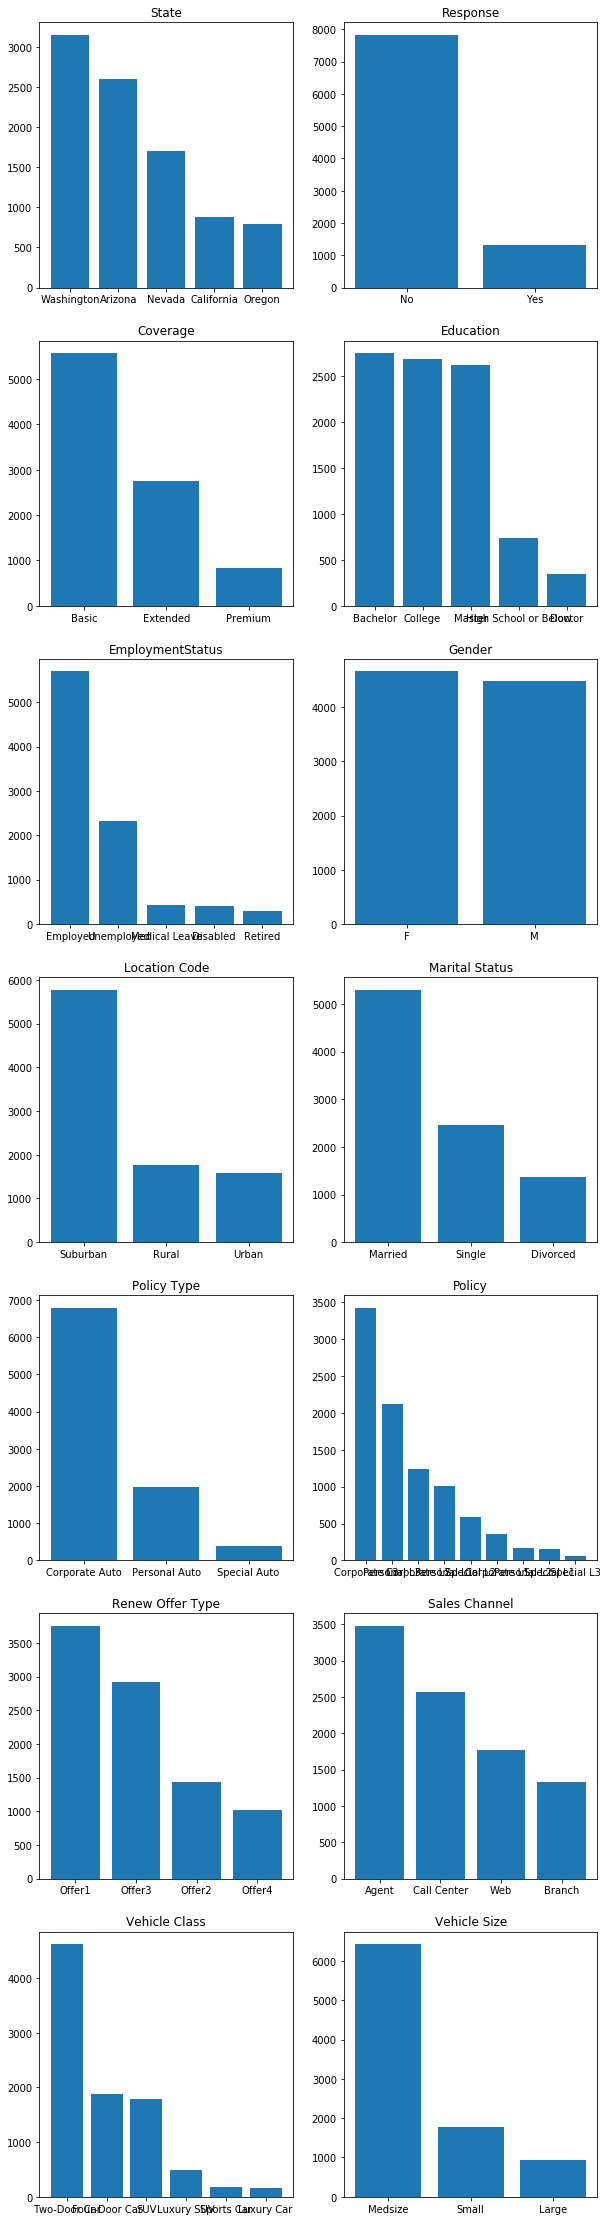

In [26]:
y = [col for col in df.columns if df[col].dtype == object]
fig, axes = plt.subplots(int((len(y)/2)), 2, figsize=(10,40))
for i, x in enumerate(y):
    axes[int(i/2)][i%2].bar(df[x].unique(), df[x].value_counts())
    axes[int(i/2)][i%2].set_title(x)

### Columns - Numerical Variable

In [28]:
df.describe()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,734166.837749,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,16.942769,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,734138.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,734152.000000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,734166.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,734181.000000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,734196.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


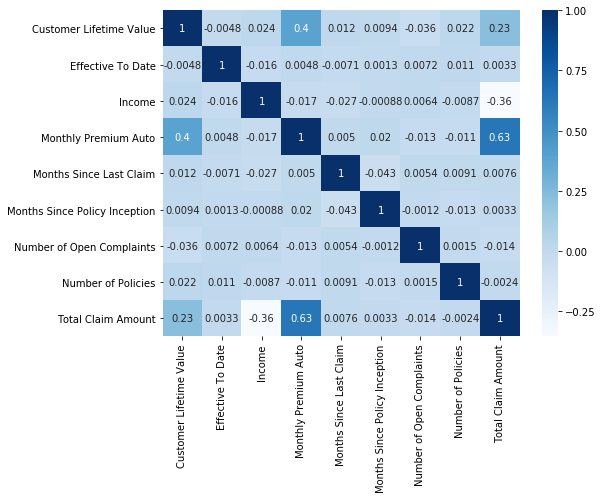

In [29]:
df.corr()
fig, axes = plt.subplots(1,1, figsize=(8,6))
sns.heatmap(df.corr(), cmap=plt.cm.Blues,  annot=True)

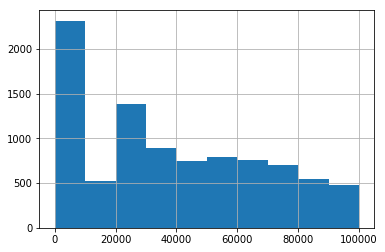

In [30]:
df['Income'].hist()

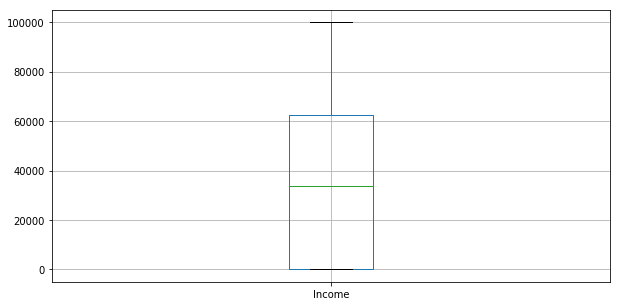

In [31]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
df.boxplot(column='Income')

Numeric_cols = df._get_numeric_data()
fig, axes = plt.subplots(int((len(Numeric_cols)/2)), 2, figsize=(10,40))
for i, x in enumerate(Numeric_cols):
    axes[int(i/2)][i%2].hist(df[x])
    axes[int(i/2)][i%2].set_title(x)

### Total Claim Amount

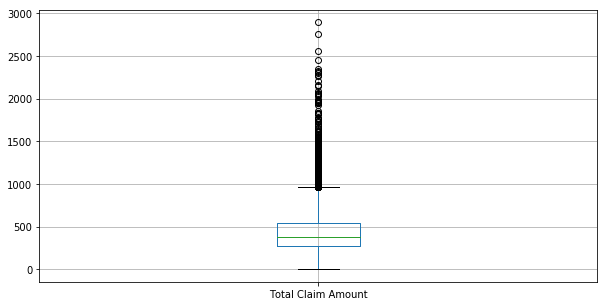

In [32]:
fig, axes = plt.subplots(1,1, figsize=(10,5))
df.boxplot(column='Total Claim Amount')

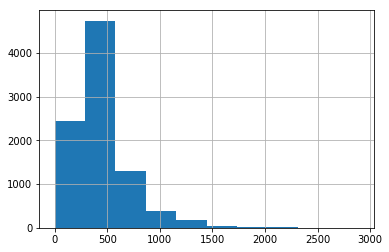

In [33]:
df['Total Claim Amount'].hist()

In [34]:
df['Total Claim Amount'][2334]

0.09900700000000001

In [35]:
Total_claim_min = df['Total Claim Amount'].min()
Total_claim_max = df['Total Claim Amount'].max()
Total_claim_mean = df['Total Claim Amount'].mean()
Total_claim_q1 = df['Total Claim Amount'].quantile(0.25)
Total_claim_q2 = df['Total Claim Amount'].quantile(0.75)
print(Total_claim_min, Total_claim_max, Total_claim_mean, Total_claim_q1, Total_claim_q2)

0.09900700000000001 2893.239678 434.0887943128969 272.2582445 547.5148387500001


In [36]:
#Labels = 0: Low , Moderate, High
cutoffs = [0, Total_claim_q1, Total_claim_q2, Total_claim_max]
df['Total Claim Labels'] = pd.cut(df['Total Claim Amount'],cutoffs, labels=[0,1,2])
print(df['Total Claim Labels'].head())


0    1
1    2
2    2
3    1
4    0
Name: Total Claim Labels, dtype: category
Categories (3, int64): [0 < 1 < 2]


In [37]:
# Problemas con el NAN, el primer valor no lo cogía
df.index[df['Total Claim Labels'].isna() == True].tolist()
df['Total Claim Amount'][2334]

0.09900700000000001

In [82]:
df_model.head()

,Customer Lifetime Value,Effective To Date,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Total Claim Labels,State_California,State_Nevada,State_Oregon,State_Washington,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Gender_M,Location Code_Suburban,Location Code_Urban,Marital Status_Married,Marital Status_Single,Policy Type_Personal Auto,Policy Type_Special Auto,Policy_Corporate L2,Policy_Corporate L3,Policy_Personal L1,Policy_Personal L2,Policy_Personal L3,Policy_Special L1,Policy_Special L2,Policy_Special L3,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,2763.519279,734192,56274,69,32,5,0,1,384.811147,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,6979.535903,734168,0,94,13,42,0,8,1131.464935,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,12887.431650,734187,48767,108,18,38,0,2,566.472247,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,7645.861827,734157,0,106,18,65,0,7,529.881344,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,2813.692575,734171,43836,73,12,44,0,1,138.130879,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## Machine Learning 

Let's convert them to ordinal data using Pandas' get_dummies

In [38]:
#df['Total Claim Labels'].astype(object)
#columns = [col for col in df.columns if (df[col].dtype == object)]
columns=[col for col in df.columns if df[col].dtype == object]

df_model = pd.get_dummies(data=df, columns = columns, drop_first=True)

In [99]:
cols = [col for col in df_model.columns if col != ['Total Claim Labels']]
X = df_model[cols]
y = df_model['Total Claim Labels']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
display(X_train.shape)
display(X_test.shape)

display(y_train.shape)
display(y_test.shape)

(7307, 53)

(1827, 53)

(7307,)

(1827,)

### SVM - SVC

In [41]:
clf = svm.SVC()
clf

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
clf = svm.SVC()
clf.fit(X_train, y_train)
print('Score:', clf.score(X_test, y_test))
print('Intercept:', clf.intercept_)
y_pred = clf.predict(X_test)

/home/miriam/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Score: 0.5604816639299398
Intercept: [-0.44438716  0.06739658  0.47932188]


In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5604816639299398


### SVM - SVC (Robust Scaler)

In [49]:
robut_scaler = RobustScaler().fit(X_train)

X_train_transform = robut_scaler.fit_transform(X_train)
X_test_transform = robut_scaler.transform(X_test)

clf.fit(X_train_transform, y_train)
clf.score(X_test, y_test)
y_pred_transform = clf.predict(X_test_transform)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_transform))

/home/miriam/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy: 1.0


### Logistic Regression 

In [62]:
clf_logistic = linear_model.LogisticRegression()
clf_logistic.fit(X_train, y_train)
clf_logistic.score(X_test, y_test)
y_pred_logistic = clf_logistic.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logistic))

/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.9605911330049262


In [72]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_logistic)

totals = cm.sum(axis=1)
cm_total = [totals, totals, totals]
display(cm.sum(axis=1))

m2 = ((cm/cm_total)*100).astype(int)
display(m2)


from confussion import print_confusion_matrix
print_confusion_matrix(m2,['Low','Moderate', 'High'])

array([431, 927, 469])

array([[95,  2,  0],
       [ 2, 97,  2],
       [ 0,  3, 93]])

In [ ]:
from confussion_matrix import print_confusion_matrix
cmatrix = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cmatrix)
print_confusion_matrix(cmatrix, class_names=[i for i in range(10)])

### Principal components 

In [93]:
# Principal Components
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

principalComponents = pca.fit_transform(X)

df_pca = pd.DataFrame(data=principalComponents, columns =['pc1', 'pc2','pc3','pc4', 'pc5','pc6', 'pc7', 'pc8', 'pc9', 'pc10'])
display(df_pca.head())
display(df_pca.shape)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,18585.936413,-5349.049701,65.957055,-44.392062,-14.614736,25.458866,16.626294,-2.056373,-0.421500,0.504058
1,-37664.848699,-801.034014,575.950466,-9.404871,-42.477761,1.506097,-2.277212,4.996718,-0.334825,0.083017
2,11137.265056,4819.388042,122.144219,-10.547694,-2.977267,20.372182,2.904518,-1.041341,-0.350000,-0.677039
3,-37658.938458,-140.732647,-29.576576,17.928041,13.218909,-10.421998,2.768590,4.070997,-0.396848,0.575434
4,6149.346549,-5229.546661,-222.989407,-3.170168,7.922040,4.053108,-3.057435,-1.926636,-0.398858,0.769827


(9134, 10)

In [95]:
X = df_pca
y = df_model['Total Claim Labels']

X_pca = df_pca
y_pca = df_model['Total Claim Labels']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2)

In [104]:
clf_logistic = linear_model.LogisticRegression()
clf_logistic.fit(X_train_pca, y_train_pca)
clf_logistic.score(X_test_pca, y_test_pca)
y_pred_logistic_pca = clf_logistic.predict(X_test_pca)
print("Accuracy:",metrics.accuracy_score(y_test_pca, y_pred_logistic_pca))

/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/miriam/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 0.9392446633825944


### Cross Validation Score

In [122]:
from sklearn.model_selection import KFold, cross_val_score

#X = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c"]

k_fold = KFold(n_splits=5)

for train_indices, test_indices in k_fold.split(X):
    print('Train: %s | test: %s' % (train_indices, test_indices))
    y_predict_cross = clf_logistic.predict(test_indices)
    print(print("Accuracy:",metrics.accuracy_score(y_test_pca, y_predict_cross)))
    
#print('')

#for train_indices, test_indices in k_fold.split(y):
    #print('Train: %s | test: %s' % (train_indices, test_indices))

ValueError: Expected 2D array, got 1D array instead:
array=[   0    1    2 ... 1824 1825 1826].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

AttributeError: 'numpy.ndarray' object has no attribute 'head'